In [1]:
from src.db.datahandler import DataHandler
from src.plotting import plot_price_1inch, plot_regression, plot_predictions
from src.configs.config import COINS, ALL, SYMBOL_TO_ADDRESS, ADDRESS_TO_SYMBOL
from src.sim.slippage import add_price_impact, regress
from src.modules.market import ExternalMarket
from itertools import permutations
import pandas as pd

%load_ext autoreload
%autoreload 2

In [2]:
datahandler = DataHandler()

In [3]:
pair = (SYMBOL_TO_ADDRESS["WBTC"], SYMBOL_TO_ADDRESS["USDT"])
in_token = pair[0]
in_token_sym = ADDRESS_TO_SYMBOL[in_token]
out_token = pair[1]
out_token_sym = ADDRESS_TO_SYMBOL[out_token]

In [4]:
quotes = datahandler.get_quotes(pair=pair, h=True)
print(f"We have {quotes.shape[0]} quotes.")
quotes.head()

We have 440 quotes.


,src,dst,in_amount,out_amount,price,timestamp,src_decimals,dst_decimals
0,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,1.13780705,41098.029179,36120.385419,1700159379,8,6
1,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,2.08557838,75275.41507,36093.304280,1700159381,8,6
2,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,3.82282495,137975.189178,36092.468523,1700159382,8,6
3,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,0.03,1085.036487,36167.882900,1700159371,8,6
4,0x2260fac5e5542a773aa44fbcfedf7c193bc2c599,0xdac17f958d2ee523a2206206994597c13d831ec7,0.05498942,1979.234877,35993.012419,1700159371,8,6


/root/crvUSDrisk/src/plotting/__init__.py:607: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  cbar.ax.set_yticklabels(dt.dt.strftime('%d %b %Y'))


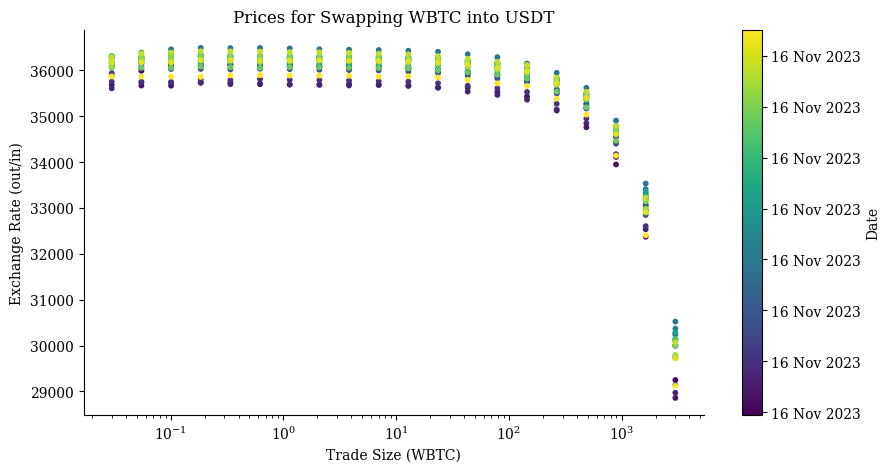

In [5]:
_ = plot_price_1inch(quotes, in_token_sym, out_token_sym)

In [6]:
min_x = ALL[in_token_sym]["min_trade_size"]
max_x = ALL[in_token_sym]["max_trade_size"]

# TODO price impact can't be computed on the "best price"
# for all time. We need to compute the "best price" for each
# time period. What is the best way to do this?
quotes = add_price_impact(quotes)

res = regress(quotes, ["in_amount"], "price_impact", v=False)
b, m = res.params
market = ExternalMarket(in_token, out_token, m, b)

_ = plot_price_1inch(quotes, in_token_sym, out_token_sym)
_ = plot_regression(
    quotes, in_token_sym, out_token_sym, market, min_x, max_x, scale="log"
)
_ = plot_predictions(
    quotes, in_token_sym, out_token_sym, market, min_x, max_x, scale="log"
)

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).